<a href="https://colab.research.google.com/github/dtabuena/Data_Explore/blob/main/Cluster_CA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl
!pip install XlsxWriter
!pip install pingouin
from IPython.display import clear_output
import pandas as pd
import os
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

clear_output()

In [2]:
plot_extras = True
exclude_extras =True

In [3]:
link = 'https://www.dropbox.com/sh/e52vk7qbr4p0pfw/AACSiEAskL4ZSexlFN0L5S76a?dl=0'
xl_to_analyze = 'CA3 parameters for PCA.xlsx'

my_drop_folder = 'my_drop_folder'
zipped_file_path = "/content/"+my_drop_folder + ".zip"
unzipped_file_path = "/content/"+my_drop_folder
if not( os.path.exists(zipped_file_path)):
    !wget -O $zipped_file_path $link    # download with new name
!echo A | unzip $zipped_file_path -d $unzipped_file_path 
print(unzipped_file_path)
my_df_dict  = pd.read_excel('my_drop_folder/'+xl_to_analyze, engine='openpyxl',index_col=None,sheet_name=None)
for k in my_df_dict.keys():
    print(k)



--2022-10-10 16:35:41--  https://www.dropbox.com/sh/e52vk7qbr4p0pfw/AACSiEAskL4ZSexlFN0L5S76a?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/e52vk7qbr4p0pfw/AACSiEAskL4ZSexlFN0L5S76a [following]
--2022-10-10 16:35:41--  https://www.dropbox.com/sh/raw/e52vk7qbr4p0pfw/AACSiEAskL4ZSexlFN0L5S76a
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc199caed7a6ffa4a7a7627eeea.dl.dropboxusercontent.com/zip_download_get/BR9mpTEERhjM7MUqQ1sxpGwADPI7n3zotgGrML_4JrS5HB64B4SpL1jWm5v2M0QzChDdiBErLOCuC2WLRcpjjpDv8LviZSak4Iqwvfg9iCiSIA# [following]
--2022-10-10 16:35:42--  https://ucc199caed7a6ffa4a7a7627eeea.dl.dropboxusercontent.com/zip_download_get/BR9mpTEERhjM7MUqQ1sxpGwADPI7n3zotgGrML_4JrS5HB64B4SpL1jWm5v2M0QzChDdiBErLOCuC2WLRcpjjpDv8Lvi

In [4]:
for k in my_df_dict.keys():
    df = my_df_dict[k]
    df['type'] = k
df_list = [my_df_dict[k] for k in my_df_dict.keys()]
full_df = pd.concat(df_list,ignore_index=True)
display(full_df.head())
# if 'cell' in full_df.columns:
#     full_df = full_df.set_index('cell')
# display(full_df.head())

,cell,Cm,Rin,RMP,I-F Gain,Rheobase,Spike Latency,Max Firing rate,AP threshold,fAHP(1),sAHP,AP width,AP amp,Adaptation Ratio,AP rise time,extra,type,Cell
0,20200227-05,141.73,460.41241,-76.1,0.128571,20,132.81364,21,-39.930698,8.844119,0.309100,1.530913,85.577271,4.230169,0.859536,1.0,E4 9mo,NaN
1,20200227-16,192.26,310.57440,-74.4,0.088571,60,272.65735,24,-40.729649,13.713713,0.740107,1.299997,101.215480,2.024474,0.697698,1.0,E4 9mo,NaN
2,20200227-23,148.93,476.74438,-81.6,0.081429,40,195.36111,15,-41.984325,9.865039,1.161355,1.366726,95.695267,4.510038,0.733712,1.0,E4 9mo,NaN
3,20200305-01,134.60,503.85803,-74.1,0.182857,20,103.82200,34,-45.521481,8.474113,0.047596,1.427369,99.375008,4.267684,0.836601,0.0,E4 9mo,NaN
4,20200305-06,152.60,503.39389,-81.8,0.202857,20,127.77000,28,-45.025364,7.586112,0.438632,1.448813,97.607979,2.932468,0.802614,0.0,E4 9mo,NaN


In [5]:
for r in full_df.index:
    if full_df.loc[r,'AP amp'] <60:
        full_df.at[r,'AP amp'] = np.nan

In [6]:
if 'extras' not in full_df.columns:
    exclude_extras = False
    plot_extras = False

In [7]:
full_df.columns

Index(['cell', 'Cm', 'Rin', 'RMP', 'I-F Gain', 'Rheobase', 'Spike Latency',
       'Max Firing rate', 'AP threshold', 'fAHP(1)', 'sAHP', 'AP width',
       'AP amp', 'Adaptation Ratio', 'AP rise time', 'extra', 'type', 'Cell'],
      dtype='object')

In [8]:
labeling = ['cell','Cell','type','extra'] # non numerical data 
numericals = [c for c in full_df.columns if c not in labeling ]


full_df_norm = full_df.copy()
mean_dict = {}
sd_dict = {}

for c in full_df_norm.columns:
    if c not in labeling:
        col_mean = np.mean(full_df_norm[c])
        col_sd = np.std(full_df_norm[c])
        mean_dict[c] = col_mean
        sd_dict[c] = col_sd
        full_df_norm[c] = (full_df_norm[c] - col_mean)/col_sd


null_check = pd.isna(full_df_norm)
incomplete =[]
for r in full_df_norm.index:
    vals = np.array(null_check.loc[r,numericals])
    bad = any(vals)
    if bad:
        incomplete.append(r)
# print(incomplete)

complete = [c for c in  full_df_norm.index if c not in incomplete]
full_df_no_null = full_df_norm.loc[complete].copy()


if exclude_extras:
    is_extra = list(full_df_no_null['extra']==1)
    extra_ind = full_df_no_null.index[is_extra]
    full_df_no_null.drop( index =extra_ind, inplace=True)


data_X = full_df_no_null[numericals].to_numpy()
data_X.shape

display(full_df_no_null.head())
print('data_X.shape',data_X.shape)
data_for_fit = data_X
numericals = [n.replace('(1)', '') for n in numericals]

,cell,Cm,Rin,RMP,I-F Gain,Rheobase,Spike Latency,Max Firing rate,AP threshold,fAHP(1),sAHP,AP width,AP amp,Adaptation Ratio,AP rise time,extra,type,Cell
0,20200227-05,-0.931103,1.796564,0.018204,-0.402004,-1.227478,-1.354918,-0.824384,0.234378,0.224157,-0.879581,3.068240,-0.193045,-0.117922,0.901183,1.0,E4 9mo,NaN
1,20200227-16,0.296052,0.183750,0.338122,-1.021312,0.272773,0.747849,-0.579769,0.081505,1.815558,-0.732227,2.016875,2.087643,-0.395120,0.332292,1.0,E4 9mo,NaN
2,20200227-23,-0.756246,1.972356,-1.016827,-1.131902,-0.477352,-0.414420,-1.313614,-0.158569,0.557797,-0.588210,2.320693,1.282571,-0.082750,0.458888,1.0,E4 9mo,NaN
3,20200305-01,-1.104259,2.264200,0.394578,0.438485,-1.227478,-1.790853,0.235614,-0.835380,0.103238,-0.968985,2.596801,1.819227,-0.113208,0.820563,0.0,E4 9mo,NaN
4,20200305-06,-0.667117,2.259204,-1.054464,0.748138,-1.227478,-1.430757,-0.253616,-0.740452,-0.186964,-0.835297,2.694438,1.561523,-0.281009,0.701092,0.0,E4 9mo,NaN


data_X.shape (145, 14)


In [89]:


type_list = list(full_df_no_null['type'])
uniq_types = list(set(type_list))
uniq_types.sort()
# odds = list(range(1, len(uniq_types), 2))
# evens = [o-1 for o in odds]

# uniq_types_c = uniq_types.copy()
# uniq_types_c[evens]=uniq_types[odds]
# print(uniq_types_c)

print(uniq_types)
num_t = len(uniq_types)
type_num = [ uniq_types.index(t) for t in type_list]

colors = plt.cm.viridis(np.linspace(0,1,num_t))
alpha = .2
colors = [[0, 0, 0, 1], [0, 0, 0, alpha],
          [1, 0, 1, 1], [1, 0, 1, alpha], 
          [0, .8, .8, 1], [0, .8, .8, alpha]]

alpha = 0
colors = [[0, 0, 1, 1], [0, 0, 1, alpha],
          [1, 0, 0, 1], [1, 0, 0, alpha], 
          [0, 0.5, 0, 1], [0, 0.5, 0, alpha]]

list_colors = [colors[i] for i in type_num ]

fig_opt = {'dpi': 300, 'format':'png','bbox_inches':'tight'}

['E3 19mo', 'E3 9mo', 'E4 19mo', 'E4 9mo', 'fE4 syncre+', 'fE4 syncre-']


random_state 42


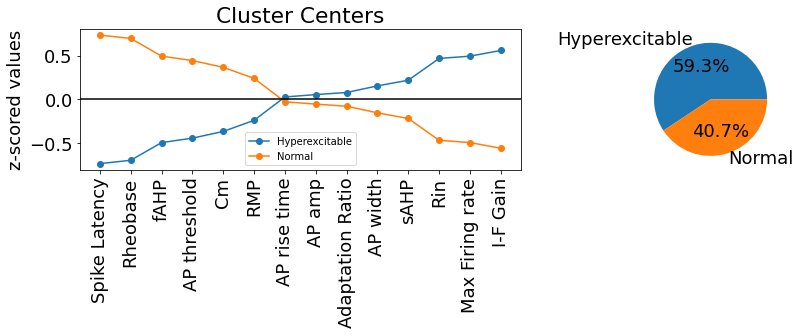

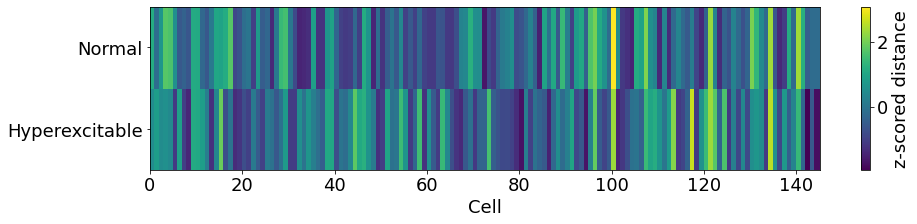

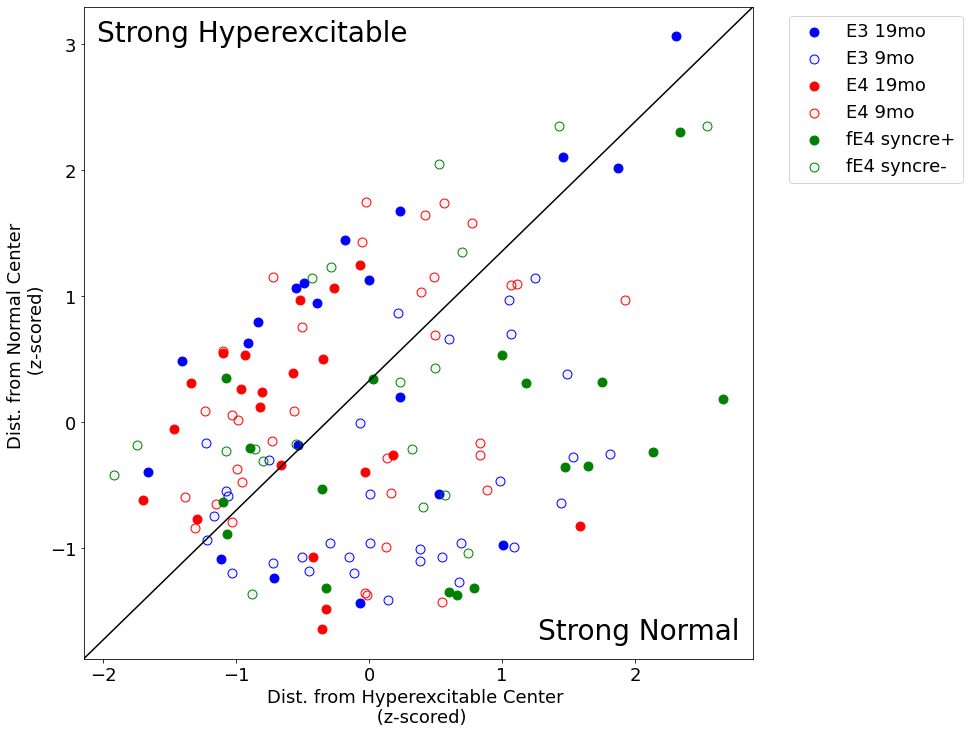

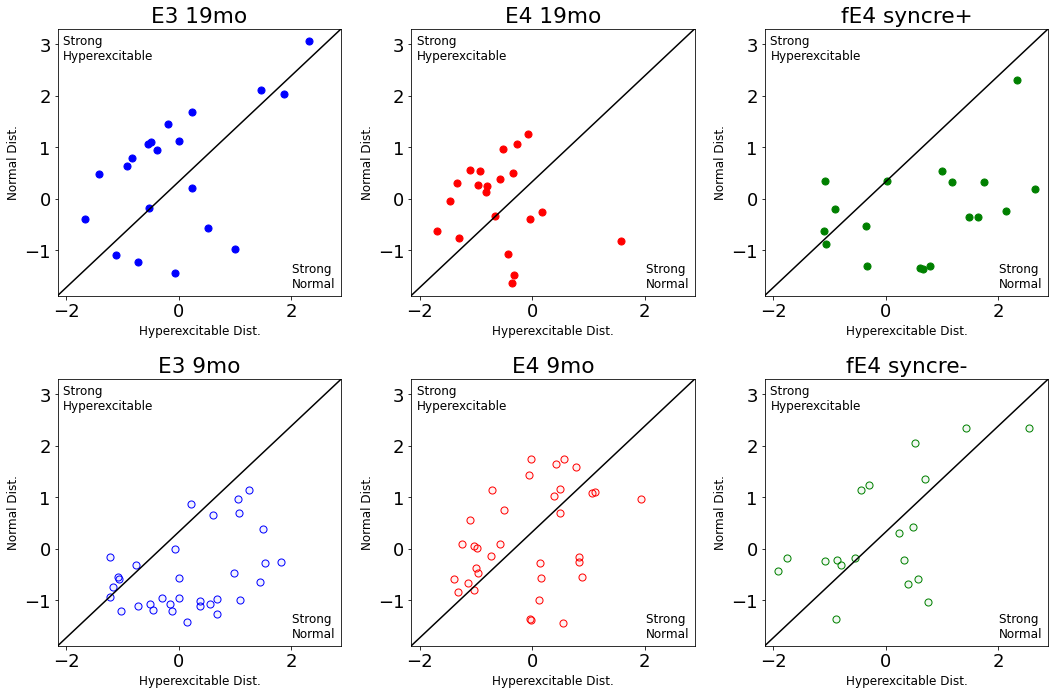

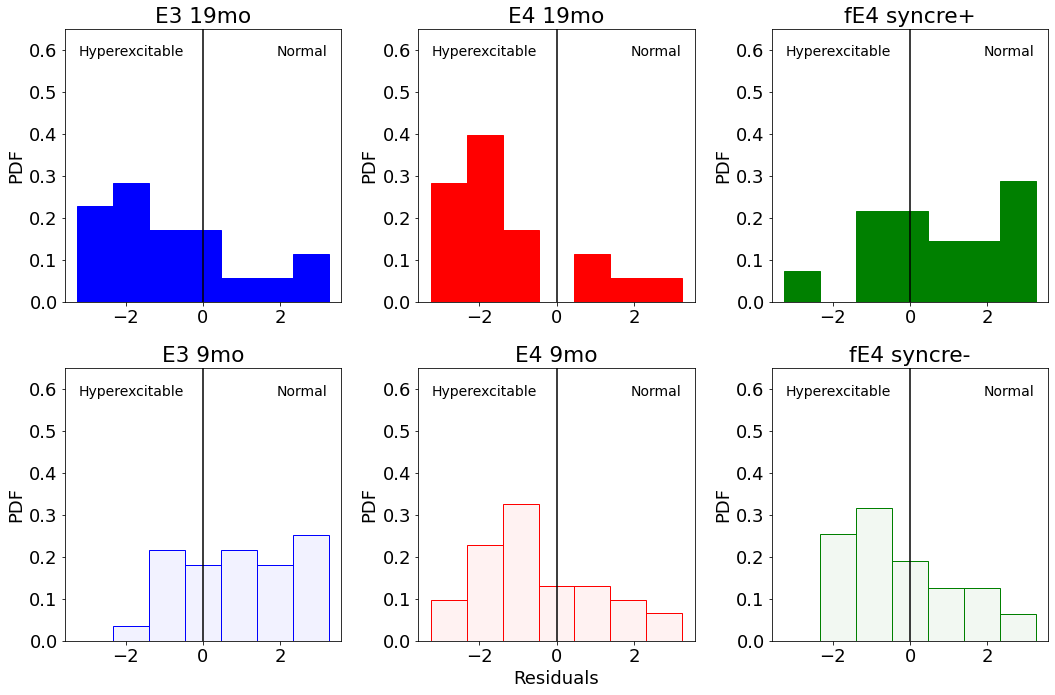

In [10]:
clust_names = ['Hyperexcitable', 'Normal']
plt.rcParams.update({'font.size': 18})

plt.show()


colors = plt.cm.viridis(np.linspace(0,1,num_t))
alpha = .05
colors = [[0, 0, 1, 1], [0, 0, 1, alpha],
          [1, 0, 0, 1], [1, 0, 0, alpha], 
          [0, 0.5, 0, 1], [0, 0.5, 0, alpha]]

list_colors = [colors[i] for i in type_num ]

random_state = 42
if 'CA1' in xl_to_analyze:
    random_state = 40
if 'Type I ' in xl_to_analyze:
    random_state = 41
if 'Type II ' in xl_to_analyze:
    random_state = 40
print('random_state',random_state)



from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=random_state).fit(data_for_fit)
centers = kmeans.cluster_centers_.T
distances = kmeans.transform(data_for_fit)

rel_centers = (centers.T - np.mean(centers.T,axis = 0)).T
################# Pie Chart and Centers
new_cent_order = np.argsort(centers[:,0]).tolist()
fig_clust_pie, ax = plt.subplots(1,2,figsize = [12,5], gridspec_kw={'width_ratios': [2, 1]} )
ax[0].plot(rel_centers[new_cent_order,:],'-o')
ax[0].legend(clust_names,loc='lower center',fontsize=10)
sorted_numericals = [numericals[i] for i in new_cent_order]
ax[0].set_xticks(np.arange(len(numericals)))
ax[0].set_xticklabels(sorted_numericals,rotation=90)
ax[0].set_ylabel('z-scored values') 
ax[0].axhline(0,color='k')
ax[0].title.set_text('Cluster Centers')
labels = kmeans.labels_ 
rel_counts = [np.mean( l == labels ) for l in range(2)]
# print(counts)
ax[1].pie( rel_counts, labels=clust_names,autopct='%1.1f%%' )
plt.rcParams.update({'font.size': 18})
plt.tight_layout()



################# Distance heat map
total_D = np.tile(np.sum(distances,axis=1),[2,1]).T
closeness = np.log(total_D/distances)
closeness = (closeness - np.mean(closeness,axis=0)) / (np.std(closeness,axis=0))  
distances_norm = (distances - np.mean(distances,axis=0)) / (np.std(distances,axis=0))
score = closeness[:,1] - closeness[:,0]


fig_distances, ax = plt.subplots(1,figsize = [15,3])
c = ax.pcolor(distances_norm.T)
ax.set_xlabel('Cell')
ax.set_yticks(np.arange(2)+0.5)
ax.set_yticklabels(clust_names)
# ax.title.set_text('Distance')
fig_distances.colorbar(c, ax=ax,label='z-scored distance')
fig_distances.savefig('Cells_in_Clusters.'+fig_opt['format'],**fig_opt)


############# Combined Scatter
fig_comb_scatter, ax = plt.subplots(1,figsize = [12,12])
for ti in range(num_t):
    t = uniq_types[ti]
    t_colr = colors[ti]    
    t_colr_edge = colors[  int(np.ceil((ti+1)/2)-1)*2 ]
    is_type = [ind for ind in range(len(type_num)) if type_num[ind]==ti]
    ax.scatter(distances_norm[is_type,0],distances_norm[is_type,1],color=t_colr, label=t,linewidths=1,edgecolors=t_colr_edge,s=80)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Dist. from '+clust_names[0]+' Center \n (z-scored)')
ax.set_ylabel('Dist. from '+clust_names[1]+' Center \n (z-scored)')
ax.plot([0, 1], [0, 1], transform=ax.transAxes,color='k')
ax.text(0.98, 0.02, 'Strong '+clust_names[1],transform=ax.transAxes,ha='right',va='bottom',fontsize=28)
ax.text(0.02, 0.98, 'Strong '+clust_names[0],transform=ax.transAxes,ha='left',va='top',fontsize=28)

comb_xlim = ax.get_xlim()
comb_ylim = ax.get_ylim()

#### separate #####
fig_sep_scatter, axs = plt.subplots(2,int(num_t/2),figsize = [int(num_t/2)*5,10])
axs = axs.T.flatten()
for ti in range(num_t):
    t = uniq_types[ti]
    t_colr = colors[ti]
    t_colr_edge = colors[  int(np.ceil((ti+1)/2)-1)*2 ]
    is_type = [ind for ind in range(len(type_num)) if type_num[ind]==ti]
    axs[ti].scatter(distances_norm[is_type,0],distances_norm[is_type,1],color=t_colr, label=t,linewidths=1,edgecolors=t_colr_edge,s=50)
    # axs[ti].set_xlabel('Dist. From Type_1')
    # axs[ti].set_ylabel('Dist. From Type_2')
    axs[ti].plot([0, 1], [0, 1], transform=axs[ti].transAxes,color=[0,0,0,1])
    axs[ti].title.set_text(t)
    axs[ti].set_xlim(comb_xlim)
    axs[ti].set_ylim(comb_ylim)


    axs[ti].set_xlabel(clust_names[0]+' Dist.',fontsize=12)
    axs[ti].set_ylabel(clust_names[1]+' Dist.',fontsize=12)
    axs[ti].text(0.98, 0.02, 'Strong \n'+clust_names[1],transform=axs[ti].transAxes,ha='right',va='bottom',fontsize=12)
    axs[ti].text(0.02, 0.98, 'Strong \n'+clust_names[0],transform=axs[ti].transAxes,ha='left',va='top',fontsize=12)

    if plot_extras:
        is_extra = list(full_df_no_null['extra']==1)
        is_extra_ind = [i for i in range(len(is_extra)) if is_extra[i] ]
        both = [i for i in is_type if i in is_extra_ind]
        axs[ti].scatter(distances_norm[both,0],distances_norm[both,1],color=t_colr,
                         label=t,marker='x',s=400,linewidths=3,edgecolors=t_colr_edge)
plt.rcParams.update({'font.size': 18})
plt.tight_layout()





#### separate #####
fig_sep_hist, axs = plt.subplots(2,int(num_t/2),figsize = [int(num_t/2)*5,10])
axs = axs.T.flatten()
for ti in range(num_t):
    t = uniq_types[ti]
    t_colr = colors[ti]
    t_colr_edge = colors[  int(np.ceil((ti+1)/2)-1)*2 ]
    is_type = [ind for ind in range(len(type_num)) if type_num[ind]==ti]

    # score = closeness[:,1] - closeness[:,0]

    axs[ti].hist(score[is_type],7,color=t_colr,histtype='bar',density=True,range=(-3.25,3.25),edgecolor=t_colr_edge)
    axs[ti].title.set_text(t)
    axs[ti].axvline(0, color='k') # vertical
    axs[ti].set_ylim(0,0.65)
    axs[ti].set_ylabel('PDF')
    fs = 14
    axs[ti].text(.95, .9, clust_names[1],transform=axs[ti].transAxes,ha='right',fontsize = fs)
    axs[ti].text(.05, .9, clust_names[0],transform=axs[ti].transAxes,ha='left',fontsize = fs)

    if plot_extras:
        is_extra = list(full_df_no_null['extra']==1)
        is_extra_ind = [i for i in range(len(is_extra)) if is_extra[i] ]
        both = [i for i in is_type if i in is_extra_ind]
        axs[ti].hist(score[both],10,color=t_colr,histtype='step',density=True,range=(-3.25,3.25))

axs[3].set_xlabel('Residuals')
plt.tight_layout()


fig_clust_pie.savefig('Clusters.'+fig_opt['format'],**fig_opt)
fig_sep_scatter.savefig('GenoType_dist_Separate.'+fig_opt['format'],**fig_opt)
fig_comb_scatter.savefig('GenoType_dist.'+fig_opt['format'],**fig_opt)
fig_sep_hist.savefig('GenoType_Histos.'+fig_opt['format'],**fig_opt)

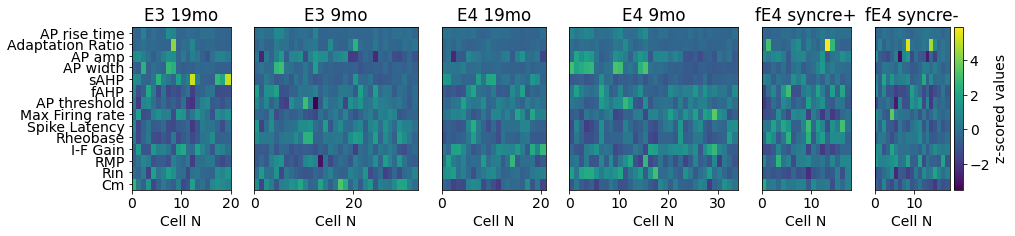

In [14]:
### raw_data_map 
plt.rcParams.update({'font.size': 14})
counts = [np.sum( [tt==t for tt in type_list]) for t in uniq_types ]
fig, ax = plt.subplots(1,num_t,figsize = [15,3],gridspec_kw={'width_ratios': counts})


data_X_min = np.min(data_for_fit)
data_X_max = np.max(data_for_fit)

for ti in range(num_t):
    t = uniq_types[ti]
    t_colr = colors[ti]
    is_type = [ind for ind in range(len(type_num)) if type_num[ind]==ti]

    c = ax[ti].pcolor(data_for_fit.T[:,is_type], vmin=data_X_min, vmax=data_X_max)
    ax[ti].set_yticks(np.arange(len(numericals))+0.5)
    if ti ==0 : ax[ti].set_yticklabels(numericals,rotation=0)
    else:  ax[ti].get_yaxis().set_visible(False)
    ax[ti].set_xlabel('Cell N')
    ax[ti].title.set_text(t)

    start = min(is_type)+3 / len(is_type)
    stop = max(is_type)-3 / len(is_type)

    
plt.colorbar(c, ax=ax[ti],label='z-scored values')
plt.show()
fig.savefig('Normalized_Vals_split.'+fig_opt['format'],**fig_opt)



In [68]:
m = [a if '19' in a else ' '+a for a in age_list_str ]
print(m)

[' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', '19mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo', ' 9mo',

In [69]:
is_E3 = ['E3' in t for t in type_list ]
is_9mo = [' 19' not in t for t in type_list ]
age_list = [9 if b else 19 for b in is_9mo]
genotype = ['E3' if b else 'E4' for b in is_E3]
is_crePos = ['cre+' in t for t in type_list ]
is_creNeg = ['cre-' in t for t in type_list ]
not_cree = [not any( [is_crePos[i], is_creNeg[i]] ) for i in range(len(is_crePos))]
e34_genotype = [genotype[i] for i in range(len(not_cree)) if not_cree[i]]
e34_score = [score[i] for i in range(len(not_cree)) if not_cree[i]]
e34_age = [str(age_list[i])+'mo' for i in range(len(not_cree)) if not_cree[i]]
genotype_list_str = [t.replace(' 9mo', '').replace(' 19mo', '') for t in type_list]
age_list_str = [str(a)+'mo' for a in age_list]
age_list_str = [a if '19' in a else ' '+a for a in age_list_str ]

df_for_34_2W_anova =  pd.DataFrame({'genotype': genotype_list_str,  'Age': age_list_str,'T1_Score': score})

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import pingouin as pg
ANOVA2_results = pg.anova(dv='T1_Score', between=['genotype', 'Age'], data=df_for_34_2W_anova, detailed=True)
display(ANOVA2_results)
ANOVA2_results.to_csv('2W_results Age-Geno.csv')



df_for_34_2W_anova['combination'] = df_for_34_2W_anova.genotype + " : " + df_for_34_2W_anova.Age
m_comp = pairwise_tukeyhsd(endog=df_for_34_2W_anova['T1_Score'], groups=df_for_34_2W_anova['combination'], alpha=0.05)
tukey_data = pd.DataFrame(data=m_comp._results_table.data[1:], columns = m_comp._results_table.data[0])
tukey_data = tukey_data.sort_values('p-adj',ascending=True)
display(tukey_data)
tukey_data.to_csv('pairwise Age-Genotype.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)


,Source,SS,DF,MS,F,p-unc,np2
0,genotype,51.631293,3.0,17.210431,5.175435,0.006793,0.100477
1,Age,20.529144,1.0,20.529144,6.173422,0.014155,0.042524
2,genotype * Age,65.357291,3.0,21.785764,6.551307,0.000355,0.123879
3,Residual,462.231636,139.0,3.325407,NaN,NaN,NaN


,group1,group2,meandiff,p-adj,lower,upper,reject
2,E3 : 9mo,E4 : 19mo,-2.0098,0.0017,-3.4809,-0.5387,True
0,E3 : 9mo,E3 : 19mo,-1.9899,0.0024,-3.4833,-0.4965,True
12,E4 : 19mo,fE4 syncre+ : 9mo,2.0742,0.0070,0.3814,3.7669,True
7,E3 : 19mo,fE4 syncre+ : 9mo,2.0543,0.0090,0.3421,3.7664,True
1,E3 : 9mo,E4 : 9mo,-1.5389,0.0094,-2.8267,-0.2511,True
4,E3 : 9mo,fE4 syncre- : 9mo,-1.7394,0.0147,-3.2570,-0.2217,True
10,E4 : 9mo,fE4 syncre+ : 9mo,1.6033,0.0353,0.0671,3.1394,True
14,fE4 syncre+ : 9mo,fE4 syncre- : 9mo,-1.8038,0.0362,-3.5371,-0.0704,True
9,E4 : 9mo,E4 : 19mo,-0.4709,0.9380,-1.9335,0.9917,False
5,E3 : 19mo,E4 : 9mo,0.4510,0.9513,-1.0341,1.9361,False


['E3 :  9mo', 'E3 : 19mo', 'E4 :  9mo', 'E4 : 19mo', 'fE4 syncre+ :  9mo', 'fE4 syncre- :  9mo']


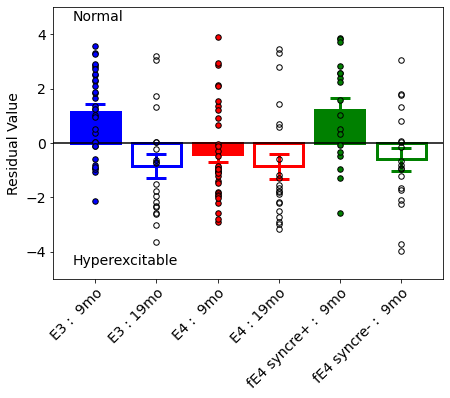

In [110]:
import scipy

fig_res_bars, ax = plt.subplots(1,figsize=[7,5])

comb_list = list(set(df_for_34_2W_anova['combination']))
comb_list.sort()
print(comb_list)


for ti in range(len(comb_list)):
    type_i = comb_list[ti]
    match_type = df_for_34_2W_anova['combination']==type_i
    y_vals = list(np.array(df_for_34_2W_anova[match_type]['T1_Score']))
    pos = list(np.ones_like(y_vals)*ti)
    t_colr = colors[ti]    
    t_colr_edge = colors[  int(np.ceil((ti+1)/2)-1)*2 ]
    ax.scatter(np.ones_like(y_vals)*ti,y_vals,  color=t_colr, label=t,linewidths=1,edgecolors='k',s=30, zorder=5)
    mean = np.mean(y_vals)
    sem = scipy.stats.sem(y_vals)
    error_kw = {'elinewidth':3,'capthick':3,'ecolor':t_colr_edge}
    ax.bar(ti,mean,yerr=sem,color=t_colr, edgecolor=t_colr_edge,capsize=10,linewidth=3,error_kw=error_kw)



ax.text(.05, .95, clust_names[1],transform=ax.transAxes,ha='left',fontsize = fs)
ax.text(.05, .05, clust_names[0],transform=ax.transAxes,ha='left',fontsize = fs)
ax.set_ylabel('Residual Value')
ax.set_ylim(-5,5)
ax.axhline(0,color='k')
ax.set_xticks(ticks=range(len(comb_list)))
ax.set_xticklabels(comb_list,rotation=45,ha='right', rotation_mode='anchor')
plt.show()

fig_res_bars.savefig('Summary_Bars.'+fig_opt['format'],**fig_opt)

100%|██████████| 1000/1000 [00:22<00:00, 44.55it/s]


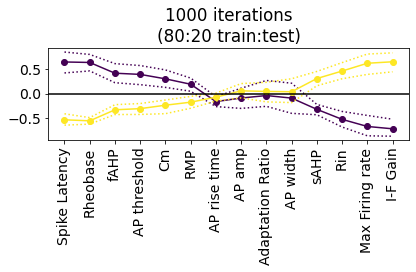

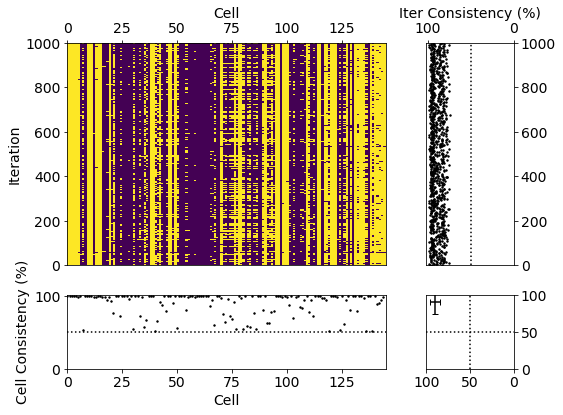

In [ ]:
from pandas.compat.numpy import np_array_datetime64_compat
###########   Cluster Validation #############
from random import sample
from tqdm import tqdm
import scipy
''' random sub sample cluster and plot cluster center similarity '''
SubSampleFrac = .8
num_iter = 1000
center_list = []
label_list = []
sub_sample_ind_list = []
full_label_list = []
k = 2
plt.rcParams.update({'font.size': 14})
pred_all = True

for ni in tqdm( range(num_iter) ):
    sub_sample_ind = []
    for t in uniq_types:
        t_inds = [i for i in range(len(type_list)) if t in type_list[i]]
        # print(t_inds)
        sub_sample_ind.extend( sample(t_inds, int(len(t_inds)*SubSampleFrac) ) )
    kmeans_iter = KMeans(n_clusters=k, random_state=42).fit(data_for_fit[sub_sample_ind][:,new_cent_order])
    centers_iter = kmeans_iter.cluster_centers_.T
    centers_iter = centers_iter - np.mean(centers_iter,axis=0)
    labels_iter = kmeans_iter.labels_
    if pred_all:
        labels_iter = kmeans_iter.predict(data_for_fit)

    if ni>0:
        corco = np.corrcoef(centers_iter.T,center_list[0].T)
        corco = corco[0:k,k:]
        ind = np.argmax(corco,axis=0) 
        centers_iter = centers_iter[:,ind]
        labels_iter = [ind[l] for l in labels_iter]
    
    if not pred_all:
        full_label_iter = np.empty((data_for_fit.shape[0],))
        full_label_iter[:] = np.nan
        full_label_iter[sub_sample_ind] = labels_iter
    else:
        full_label_iter = labels_iter

    center_list.append(centers_iter)
    label_list.append(labels_iter)
    sub_sample_ind_list.append(sub_sample_ind_list)
    full_label_list.append(full_label_iter)
   
center_stack = np.stack(center_list)
mean_center = np.mean(center_stack,0)
nintey_p_center = np.percentile(center_stack, [.5, 99.5], axis=0)

cmap = plt.cm.viridis(np.linspace(0,1,k))
fig_cv_cent, ax = plt.subplots(1)
for ki in range(k):
    ax.plot(mean_center[:,ki].T,'-o',color=cmap[ki])
    ax.plot(nintey_p_center[0,:,ki].T,':',color=cmap[ki])
    ax.plot(nintey_p_center[1,:,ki].T,':',color=cmap[ki])


ax.set_xticks(np.arange(len(numericals)))
ax.set_xticklabels(sorted_numericals,rotation=90)
ax.axhline(0, color='k')



full_label_stack = np.stack(full_label_list)

pseudo_truth = scipy.stats.mode(full_label_stack,axis=0, nan_policy='omit')[0]
is_match = (full_label_stack == pseudo_truth)*1. # convert to float so can accept nans
is_match[np.isnan(full_label_stack)]=np.nan
consistency_iter = np.nanmean(is_match, axis = 1)
mean_consistency_iter = np.nanmean(consistency_iter)
std_consistency_iter = np.nanstd(consistency_iter)
consistency_cell = np.nanmean(is_match, axis = 0)
mean_consistency_cell = np.nanmean(consistency_cell)
sd_consistency_cell = np.nanstd(consistency_cell)
consistency_report = 'label consistency: ' + str(round(mean_consistency_cell*100,1)) + '% +- ' + str(round(sd_consistency_cell*100,2)) + ' (chance: ' + str(round(1/k*100,1))+')'
# print(consistency_report)
# print('(chance: ' + str(round(1/k*100,1))+')')
ax.title.set_text(f'{num_iter} iterations\n(80:20 train:test)' )

# plt.rcParams.update({'font.size': 18})
plt.tight_layout()
plt.show()
fig_cv_cent.savefig(f'CrossVal_Data k={k} Centers.'+fig_opt['format'],**fig_opt)

fig_cv_prob, ax = plt.subplots(2,2,figsize=[8,6], gridspec_kw={'height_ratios': [3, 1],'width_ratios': [4, 1.1]}  )
ax  = ax.T.flatten()
ax[0].pcolor( full_label_stack )
ax[0].set_xlabel('Cell')
ax[0].set_ylabel('Iteration')
ax[0].xaxis.set_label_position('top') 
ax[0].xaxis.tick_top()

ax[1].scatter(np.arange(len(consistency_cell)),consistency_cell*100,color='k',s=2)
ax[1].axhline(1/k*100,color='k',linestyle=':')
ax[1].set_ylabel('Cell Consistency (%)')
ax[1].set_ylim((0,102))
ax[1].set_xlim((0,is_match.shape[1]))
ax[1].set_xlabel('Cell')


ax[2].scatter(consistency_iter*100,np.arange(num_iter),color='k',s=2)
ax[2].axvline(1/k*100,color='k',linestyle=':')
ax[2].set_xlabel('Iter Consistency (%)')
ax[2].set_xlim((102,0))
ax[2].set_ylim((0,num_iter))
ax[2].yaxis.tick_right()
ax[2].xaxis.set_label_position('top') 
ax[2].xaxis.tick_top()

# fig.delaxes(ax[3])
ax[3].errorbar(mean_consistency_iter*100, mean_consistency_cell*100, yerr=sd_consistency_cell*100, xerr=std_consistency_iter*100,color='k',capsize=3)
ax[3].axvline(1/k*100,color='k',linestyle=':')
ax[3].axhline(1/k*100,color='k',linestyle=':')
ax[3].set_xlim((100,0))
ax[3].set_ylim((0,100))
ax[3].yaxis.tick_right()

# plt.rcParams.update({'font.size': 18})
# 
# plt.show()
# plt.tight_layout()
fig_cv_prob.savefig(f'CrossVal_Data k={k} Labeling.'+fig_opt['format'],**fig_opt)

100%|██████████| 1000/1000 [00:28<00:00, 35.52it/s]


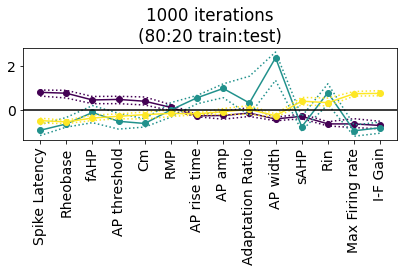

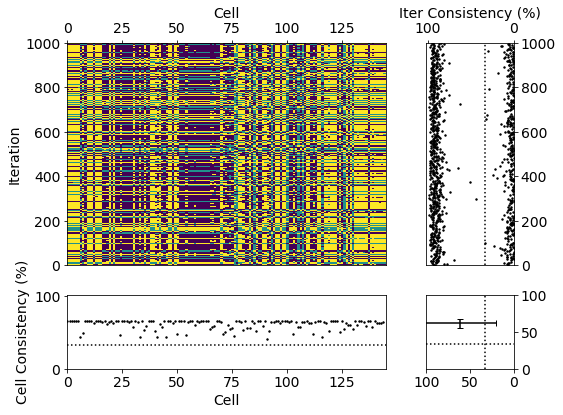

In [ ]:
from pandas.compat.numpy import np_array_datetime64_compat
###########   Cluster Validation #############
from random import sample
from tqdm import tqdm
import scipy
''' random sub sample cluster and plot cluster center similarity '''
SubSampleFrac = .8
num_iter = 1000
center_list = []
label_list = []
sub_sample_ind_list = []
full_label_list = []
k = 3
plt.rcParams.update({'font.size': 14})
pred_all = True

for ni in tqdm( range(num_iter) ):
    sub_sample_ind = []
    for t in uniq_types:
        t_inds = [i for i in range(len(type_list)) if t in type_list[i]]
        # print(t_inds)
        sub_sample_ind.extend( sample(t_inds, int(len(t_inds)*SubSampleFrac) ) )
    kmeans_iter = KMeans(n_clusters=k, random_state=42).fit(data_for_fit[sub_sample_ind][:,new_cent_order])
    centers_iter = kmeans_iter.cluster_centers_.T
    centers_iter = centers_iter - np.mean(centers_iter,axis=0)
    labels_iter = kmeans_iter.labels_
    if pred_all:
        labels_iter = kmeans_iter.predict(data_for_fit)

    if ni>0:
        corco = np.corrcoef(centers_iter.T,center_list[0].T)
        corco = corco[0:k,k:]
        ind = np.argmax(corco,axis=0) 
        centers_iter = centers_iter[:,ind]
        labels_iter = [ind[l] for l in labels_iter]
    
    if not pred_all:
        full_label_iter = np.empty((data_for_fit.shape[0],))
        full_label_iter[:] = np.nan
        full_label_iter[sub_sample_ind] = labels_iter
    else:
        full_label_iter = labels_iter

    center_list.append(centers_iter)
    label_list.append(labels_iter)
    sub_sample_ind_list.append(sub_sample_ind_list)
    full_label_list.append(full_label_iter)
   
center_stack = np.stack(center_list)
mean_center = np.mean(center_stack,0)
nintey_p_center = np.percentile(center_stack, [.5, 99.5], axis=0)

cmap = plt.cm.viridis(np.linspace(0,1,k))
fig_cv_cent, ax = plt.subplots(1)
for ki in range(k):
    ax.plot(mean_center[:,ki].T,'-o',color=cmap[ki])
    ax.plot(nintey_p_center[0,:,ki].T,':',color=cmap[ki])
    ax.plot(nintey_p_center[1,:,ki].T,':',color=cmap[ki])


ax.set_xticks(np.arange(len(numericals)))
ax.set_xticklabels(sorted_numericals,rotation=90)
ax.axhline(0, color='k')



full_label_stack = np.stack(full_label_list)

pseudo_truth = scipy.stats.mode(full_label_stack,axis=0, nan_policy='omit')[0]
is_match = (full_label_stack == pseudo_truth)*1. # convert to float so can accept nans
is_match[np.isnan(full_label_stack)]=np.nan
consistency_iter = np.nanmean(is_match, axis = 1)
mean_consistency_iter = np.nanmean(consistency_iter)
std_consistency_iter = np.nanstd(consistency_iter)
consistency_cell = np.nanmean(is_match, axis = 0)
mean_consistency_cell = np.nanmean(consistency_cell)
sd_consistency_cell = np.nanstd(consistency_cell)
consistency_report = 'label consistency: ' + str(round(mean_consistency_cell*100,1)) + '% +- ' + str(round(sd_consistency_cell*100,2)) + ' (chance: ' + str(round(1/k*100,1))+')'
# print(consistency_report)
# print('(chance: ' + str(round(1/k*100,1))+')')
ax.title.set_text(f'{num_iter} iterations\n(80:20 train:test)' )

# plt.rcParams.update({'font.size': 18})
plt.tight_layout()
plt.show()
fig_cv_cent.savefig(f'CrossVal_Data k={k} Centers.'+fig_opt['format'],**fig_opt)

fig_cv_prob, ax = plt.subplots(2,2,figsize=[8,6], gridspec_kw={'height_ratios': [3, 1],'width_ratios': [4, 1.1]}  )
ax  = ax.T.flatten()
ax[0].pcolor( full_label_stack )
ax[0].set_xlabel('Cell')
ax[0].set_ylabel('Iteration')
ax[0].xaxis.set_label_position('top') 
ax[0].xaxis.tick_top()

ax[1].scatter(np.arange(len(consistency_cell)),consistency_cell*100,color='k',s=2)
ax[1].axhline(1/k*100,color='k',linestyle=':')
ax[1].set_ylabel('Cell Consistency (%)')
ax[1].set_ylim((0,102))
ax[1].set_xlim((0,is_match.shape[1]))
ax[1].set_xlabel('Cell')


ax[2].scatter(consistency_iter*100,np.arange(num_iter),color='k',s=2)
ax[2].axvline(1/k*100,color='k',linestyle=':')
ax[2].set_xlabel('Iter Consistency (%)')
ax[2].set_xlim((102,0))
ax[2].set_ylim((0,num_iter))
ax[2].yaxis.tick_right()
ax[2].xaxis.set_label_position('top') 
ax[2].xaxis.tick_top()

# fig.delaxes(ax[3])
ax[3].errorbar(mean_consistency_iter*100, mean_consistency_cell*100, yerr=sd_consistency_cell*100, xerr=std_consistency_iter*100,color='k',capsize=3)
ax[3].axvline(1/k*100,color='k',linestyle=':')
ax[3].axhline(1/k*100,color='k',linestyle=':')
ax[3].set_xlim((100,0))
ax[3].set_ylim((0,100))
ax[3].yaxis.tick_right()

# plt.rcParams.update({'font.size': 18})
# 
# plt.show()
# plt.tight_layout()
fig_cv_prob.savefig(f'CrossVal_Data k={k} Labeling.'+fig_opt['format'],**fig_opt)

In [ ]:
root_list = []
f_list = []
import os
import shutil
# try: shutil.rmtree("/content/Results")
# except: None
# try: os.mkdir("/content/Results")
# except: None
# try: os.remove("Results.zip")
# except: None

fold_name = 'Results_' + xl_to_analyze.split('.')[0]
fold_name = fold_name.replace(' ','_')
zip_name= fold_name+'.zip'
try: os.mkdir(fold_name)
except: None

from google import colab
for root, dirs, files in os.walk("/content"):
    for f in files:
        if 'sample_data' in root: continue
        if 'Results' in root: continue
        if f.endswith(".png") or f.endswith(".csv"):
            shutil.copyfile(os.path.join(root,f), os.path.join(root,fold_name,f))

!zip -r $zip_name $fold_name
colab.files.download(zip_name)

  adding: Results_CA3_parameters_for_PCA/ (stored 0%)
  adding: Results_CA3_parameters_for_PCA/Cells_in_Clusters.png (deflated 23%)
  adding: Results_CA3_parameters_for_PCA/GenoType_dist_Separate.png (deflated 17%)
  adding: Results_CA3_parameters_for_PCA/GenoType_dist.png (deflated 15%)
  adding: Results_CA3_parameters_for_PCA/CrossVal_Data k=3 Labeling.png (deflated 9%)
  adding: Results_CA3_parameters_for_PCA/GenoType_Histos.png (deflated 30%)
  adding: Results_CA3_parameters_for_PCA/Clusters.png (deflated 11%)
  adding: Results_CA3_parameters_for_PCA/Normalized_Vals_split.png (deflated 18%)
  adding: Results_CA3_parameters_for_PCA/2W_results Age-Geno.csv (deflated 39%)
  adding: Results_CA3_parameters_for_PCA/CrossVal_Data k=2 Centers.png (deflated 7%)
  adding: Results_CA3_parameters_for_PCA/CrossVal_Data k=2 Labeling.png (deflated 11%)
  adding: Results_CA3_parameters_for_PCA/CrossVal_Data k=3 Centers.png (deflated 6%)
  adding: Results_CA3_parameters_for_PCA/pairwise Age-Genotyp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:
##### Importance Test

labels = kmeans.predict(data_for_fit)

num_rep = 5000
scram_space = data_for_fit.copy()
sample_indicies = np.arange(data_for_fit.shape[0])
importance_df = pd.DataFrame(index=numericals)
importance_df['p_flip_mean'] = None
importance_df['p_flip_std'] = None
importance_df['iter_p_flip'] = None

for ni in tqdm( range(len(numericals)) ) :
    n = numericals[ni]
    p_flip_list = []
    for rep in range(num_rep):
        scram_space = data_for_fit.copy()
        r_samp = np.random.choice(sample_indicies, len(sample_indicies))
        scram_space[:,ni] = scram_space[r_samp,ni]
        # scram_space[:,ni] = np.random.normal(loc=0.0, scale=1.0, size=(len(sample_indicies)))
        alt_labels =  kmeans.predict(scram_space)
        p_flip = np.mean(np.not_equal(labels,alt_labels))*100
        p_flip_list.append(p_flip)
    importance_df.at[n,'iter_p_flip'] = p_flip_list
    importance_df.at[n,'p_flip_mean'] = np.mean(p_flip_list)
    importance_df.at[n,'p_flip_std'] = np.std(p_flip_list)



print("")
importance_df.sort_values('p_flip_mean',ascending=True,inplace=True)
plt.barh(np.arange(len(numericals)), importance_df['p_flip_mean'], tick_label= importance_df.index)
plt.errorbar(importance_df['p_flip_mean'], np.arange(len(numericals)), yerr=None, xerr=importance_df['p_flip_std'], ls='none')


NameError: ignored

[ 5  4  3  8  6  1  7  0  2  9 10 12 11 13]
Spike Latency
Rheobase
I-F Gain
fAHP
Max Firing rate
Rin
AP threshold
Cm
RMP
sAHP
AP width
Adaptation Ratio
AP amp
AP rise time
